In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [57]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Ustunlar:

- Age - yosh
- Sex - jins
- BP - qon bosimi
- Cholesterol - qondagi xolesterol
- Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati

In [58]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
164,16,M,HIGH,NORMAL,19.007,drugY
9,43,M,LOW,NORMAL,19.368,drugY
135,74,M,LOW,NORMAL,11.939,drugX
80,60,M,HIGH,HIGH,13.934,drugB
147,26,F,HIGH,NORMAL,12.307,drugA
106,22,M,NORMAL,HIGH,11.953,drugX
193,72,M,LOW,HIGH,6.769,drugC
100,31,M,HIGH,NORMAL,11.871,drugA
20,57,M,LOW,NORMAL,19.128,drugY
150,49,M,HIGH,NORMAL,8.700,drugA


In [59]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [60]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [49.   ,  0.   ,  2.   ,  0.   , 16.275],
       [41.   ,  1.   ,  1.   ,  0.   , 11.037],
       [60.   ,  1.   ,  2.   ,  0.   , 15.171],
       [43.   ,  1.   ,  1.   ,  1.   , 19.368],
       [47.   ,  0.   ,  1.   ,  0.   , 11.767],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [43.   ,  1.   ,  1.   ,  0.   , 15.376],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [50.   ,  0.   ,  2.   ,  0.   , 12.703],
       [16.   ,  0.   ,  0.   ,  1.   , 15.516],
       [69.   ,  1.   ,  1.   ,  1.   , 11.455],
       [43.   ,  1.   ,  0.   ,  0.   , 13.972],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [32.   ,  0.   ,  0.   ,  1.   , 25.974],
       [57.   ,  1. 

In [61]:
y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Train/test split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [71]:
tree_model = DecisionTreeClassifier().fit(X_train, y_train)

In [72]:
y_pred = tree_model.predict(X_test)
y_pred

array(['drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugB', 'drugX', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugC', 'drugB', 'drugY'], dtype=object)

In [73]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [74]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


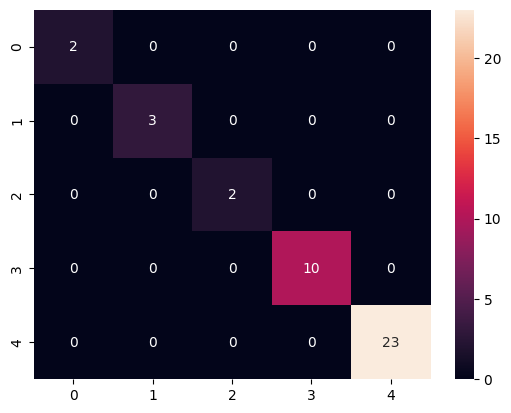

In [75]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

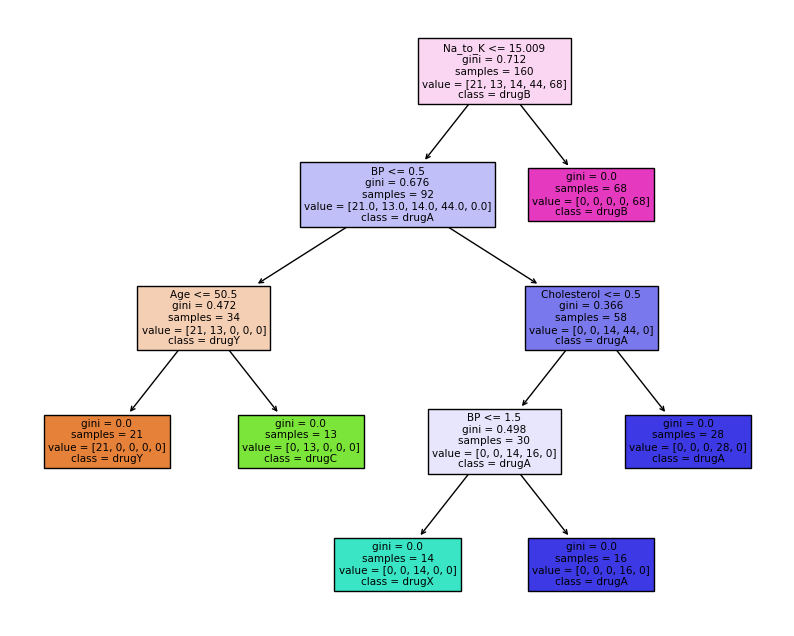

In [76]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(10,8))
tree.plot_tree(tree_model, class_names=classes, feature_names=cols, filled=True)
plt.show()

# Hyperparameters

Accurancy 1.0


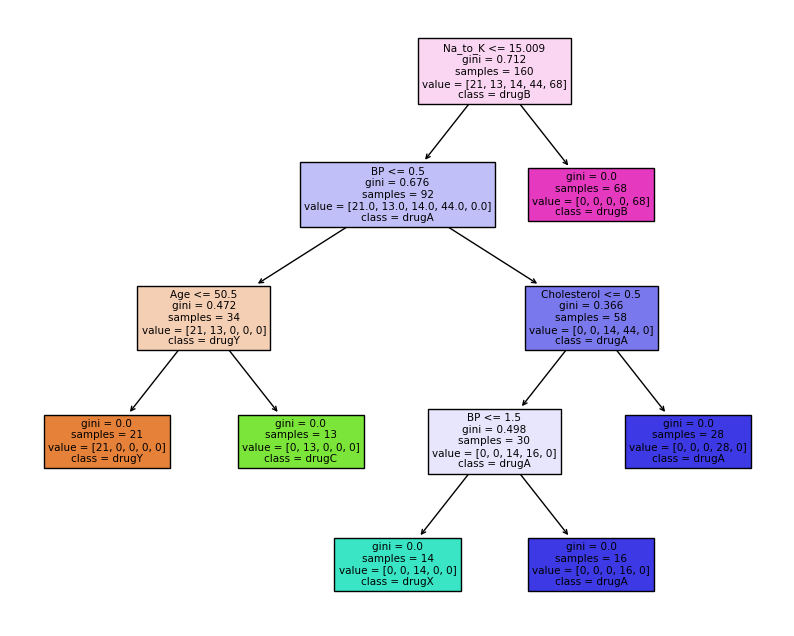

In [84]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print('Accurancy', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# max_depth

Accurancy 0.95


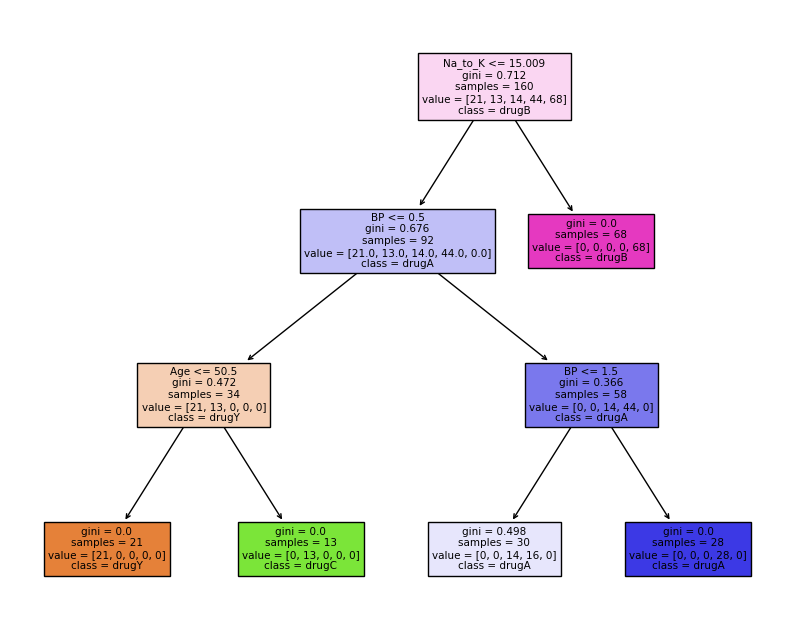

In [80]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print('Accurancy', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# min_samples_leaf

Accurancy 0.95


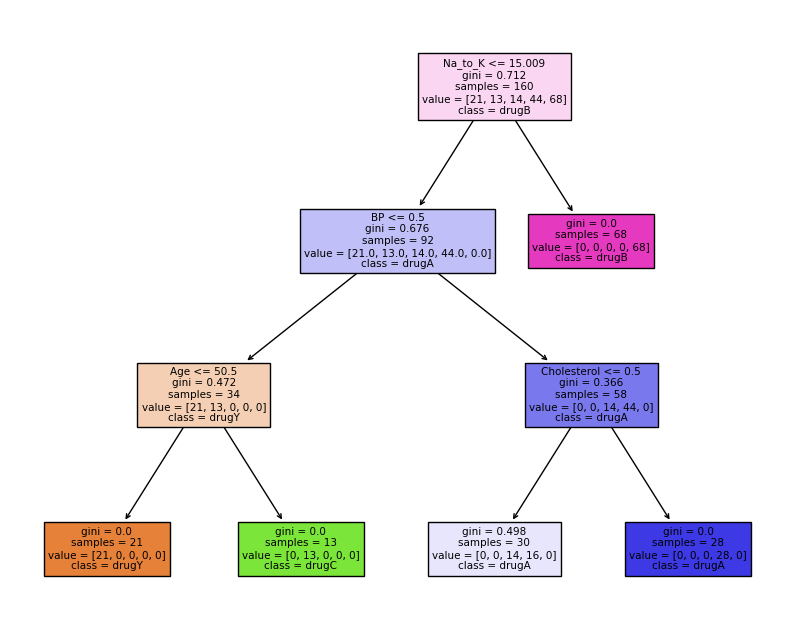

In [81]:
tree_model = DecisionTreeClassifier(min_samples_leaf=4, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print('Accurancy', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Accurancy 0.95


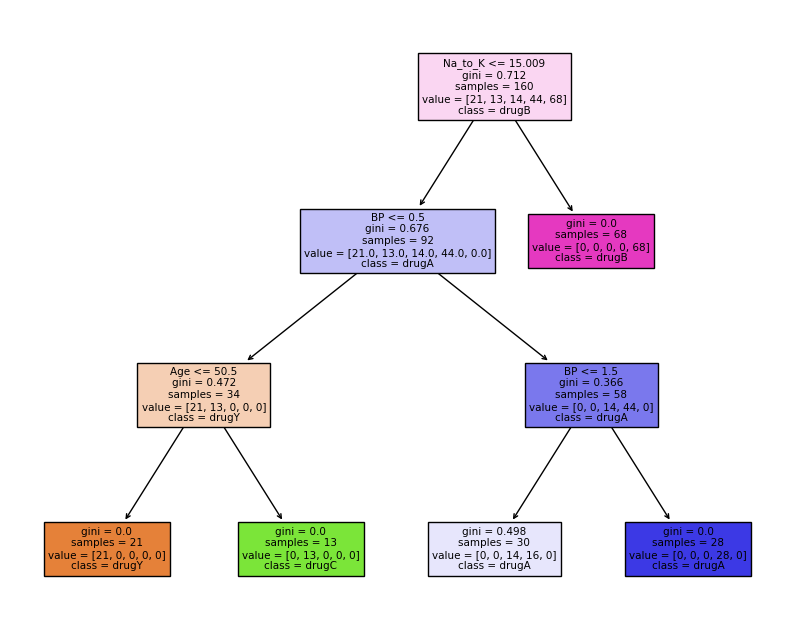

In [82]:
tree_model = DecisionTreeClassifier(min_samples_leaf=6, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print('Accurancy', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()